# Evaluation of a Theano powered HMC Sampler 
In this notebook we want to debug and evaluate the performance of a custom HMC sampler developed with theano, a numeric framework for symbolic computations. This allows for automatic differentiation, which is really helpful for implementing the Hamiltonian Monte Carlo algorithm.

### How it works:
We can create theano symbols on which we can execute Numpy functions. All operations on these theano variables return new theano variables that log the previous operations. This way we can derive a computation graph from complex numpy functions. Through these computation graphs, theano can derive automatic differentiation.

In [1]:
from hmc import *
import plotting
import model
import numpy as np

In [2]:
import plotly.offline
plotly.offline.init_notebook_mode(connected=True)

## Dealing with Theano incompatibilities
Sadly Theano does not offer 100 % compatibility with all numpy functions. So we are required to write some code with Theano functions. Theano functions return theano tensors, which causes problems, if we want to use the same functions in non-theano environments. Therefore we will provide a higher order function, which turns a function, which returns a theano variable into a function which returns proper numpy arrays.

In [3]:
import theano

def fun(f):
    x = theano.tensor.dvector('x')
    return theano.function([x],f(x))

## simple 2D example
basically a mixture of a uniform prior and a gaussian posterior.

In [2]:
initial = [1,1]
#crude estimation, possibly correct within orders of magnitude
M=np.eye(2)

pnts = sample(f=model.p_xy,i=initial,L=15,M=np.eye(2),n=10000)

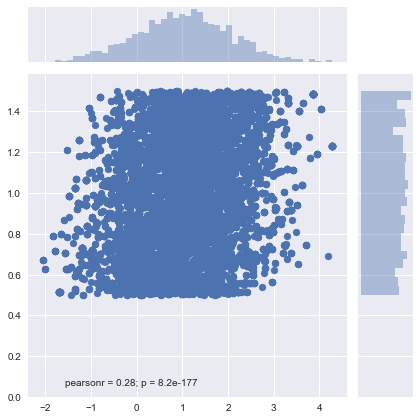

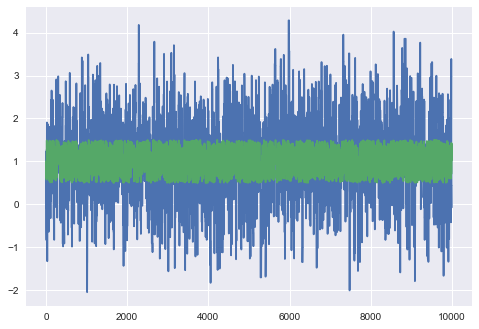

In [22]:
plotting.hist2d(pnts)
plotting.trace3d_ly(np.array(pnts)[::10],fun(model.p_xy),title="uniform prior, normal likelihood")
plotting.autocorrelation_plot(pnts)

## Gaussian Shells

In [13]:
initial = [0,0]
#crude estimation, possibly correct within orders of magnitude
M_ =np.eye(2)/np.var(np.array(model.c).T,1)

pnts = sample(f=model.L_gs,i=initial,L=20,M=M_,n=10000)

In [16]:
#pts = test(M=np.eye(2)/15,L=15,n=20000)
pts=test(M=M_,L=20, theta=[0,0],n=10000)

ratio: 0.000100
means: [-2.11643316  3.02315374]
circle_means: [-2.72889457 -2.41879766]
var: [ 0.00717835  0.01464657]


We can see that our Theano developed framework, without any optimizations, generates 10^5 samples in less than one minute. This is astonishing. A pure python implementation of 

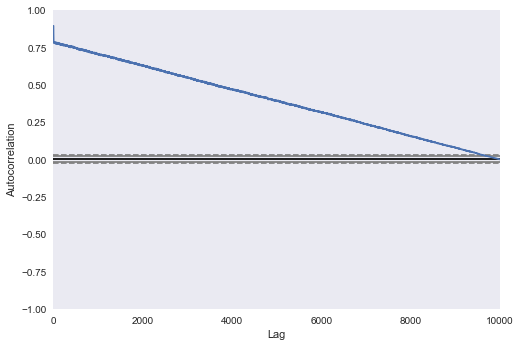

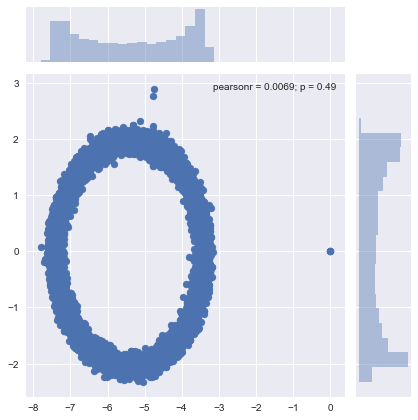

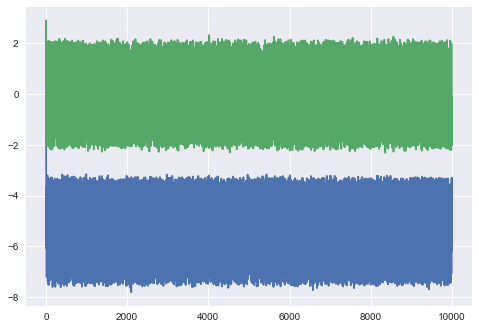

In [18]:
plotting.hist2d(pnts)
plotting.trace3d_ly(np.array(pnts)[::10],fun(model.L_gs),title="Gaussian Shells, Metropolis",rng=[-8,8])
plotting.autocorrelation_plot(pnts)

In [ ]:
plotting.plotfun(model.L_gs,[-15,-15],[15,15])

We can see that HMC is not that good when it comes to multimodal distributions

## Egg box model

In [ ]:
initial = (5*np.pi,5*np.pi)
M_=np.eye(2)/(2.5*np.pi)**2
pnts = sample(f=model.l_p_egg,i=initial,L=20,M=M_,n=10000)

In [ ]:
plotting.hist2d(pnts)
plotting.trace3d_ly(np.array(pnts)[::10],fun(lambda x:np.log(model.l_p_egg(x))),title="Egg-Box, Metropolis",rng=[0,10*np.pi])
plotting.autocorrelation_plot(pnts)

Especially for this example, HMC absolutely blows. Still, we have to consider that these are rather artificial examples, which are intended to be unsolvable for advanced Gradient based approaches.